In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
match_data=pd.read_csv("D:/IPL ANALYSIS/IPL_Matches_2008_2022.csv")
ball_data=pd.read_csv("D:/IPL ANALYSIS/IPL_Ball_by_Ball_2008_2022.csv")

In [6]:
match_data.head()

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough
3,1312197,Kolkata,2022-05-24,2022,Qualifier 1,Rajasthan Royals,Gujarat Titans,"Eden Gardens, Kolkata",Gujarat Titans,field,N,Gujarat Titans,Wickets,7.0,NaN,DA Miller,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",BNJ Oxenford,VK Sharma
4,1304116,Mumbai,2022-05-22,2022,70,Sunrisers Hyderabad,Punjab Kings,"Wankhede Stadium, Mumbai",Sunrisers Hyderabad,bat,N,Punjab Kings,Wickets,5.0,NaN,Harpreet Brar,"['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...","['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...",AK Chaudhary,NA Patwardhan


In [7]:
ball_data.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,1312200,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,1312200,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,1312200,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,1312200,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,1312200,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


In [8]:
match_data.isnull().sum()

ID                   0
City                51
Date                 0
Season               0
MatchNumber          0
Team1                0
Team2                0
Venue                0
TossWinner           0
TossDecision         0
SuperOver            4
WinningTeam          4
WonBy                0
Margin              18
method             931
Player_of_Match      4
Team1Players         0
Team2Players         0
Umpire1              0
Umpire2              0
dtype: int64

In [9]:
ball_data.isnull().sum()

ID                        0
innings                   0
overs                     0
ballnumber                0
batter                    0
bowler                    0
non-striker               0
extra_type           213905
batsman_run               0
extras_run                0
total_run                 0
non_boundary              0
isWicketDelivery          0
player_out           214803
kind                 214803
fielders_involved    217966
BattingTeam               0
dtype: int64

In [10]:
match_data.shape

(950, 20)

In [11]:
ball_data.shape

(225954, 17)

In [12]:
match_data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [13]:
print('Matches played so far:-',match_data.shape[0])
print('\n Cities played at:',match_data['City'].unique())
print('\n teams Participated:',match_data['Team1'].unique())

Matches played so far:- 950

 Cities played at: ['Ahmedabad' 'Kolkata' 'Mumbai' 'Navi Mumbai' 'Pune' 'Dubai' 'Sharjah'
 'Abu Dhabi' 'Delhi' 'Chennai' nan 'Hyderabad' 'Visakhapatnam'
 'Chandigarh' 'Bengaluru' 'Jaipur' 'Indore' 'Bangalore' 'Kanpur' 'Rajkot'
 'Raipur' 'Ranchi' 'Cuttack' 'Dharamsala' 'Kochi' 'Nagpur' 'Johannesburg'
 'Centurion' 'Durban' 'Bloemfontein' 'Port Elizabeth' 'Kimberley'
 'East London' 'Cape Town']

 teams Participated: ['Rajasthan Royals' 'Royal Challengers Bangalore' 'Sunrisers Hyderabad'
 'Delhi Capitals' 'Chennai Super Kings' 'Gujarat Titans'
 'Lucknow Super Giants' 'Kolkata Knight Riders' 'Punjab Kings'
 'Mumbai Indians' 'Kings XI Punjab' 'Delhi Daredevils'
 'Rising Pune Supergiant' 'Gujarat Lions' 'Rising Pune Supergiants'
 'Pune Warriors' 'Deccan Chargers' 'Kochi Tuskers Kerala']


In [14]:
match_per_season=match_data.groupby(['Season'])['ID'].count().reset_index().rename(columns={'ID':'Matches'})
match_per_season

,Season,Matches
0,2007/08,58
1,2009,57
2,2009/10,60
3,2011,73
4,2012,74
5,2013,76
6,2014,60
7,2015,59
8,2016,60
9,2017,59


Text(0.5, 1.0, 'Total matches played in Each season')

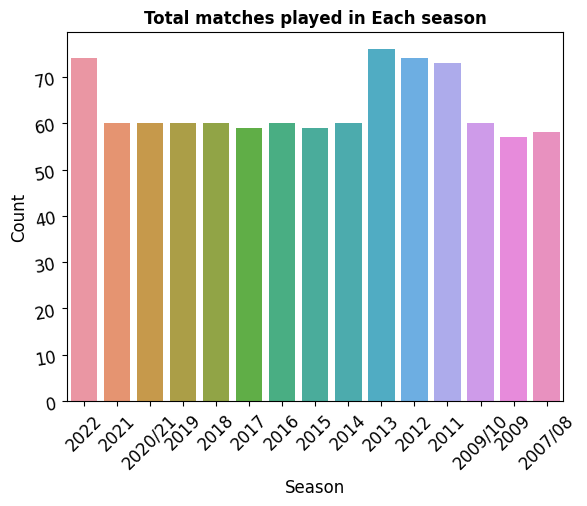

In [15]:
#create a bar graph
sns.countplot(x=match_data['Season'])
plt.xticks(rotation=45,fontsize=12)   #rotation:helps to rotate the x labels point name
plt.yticks(rotation=10,fontsize=12)   #rotation :helps to rotate the y labels point name by 10
plt.xlabel('Season',fontsize=12)     
plt.ylabel('Count',fontsize=12)
plt.title('Total matches played in Each season',fontsize=12,fontweight='bold')

In [16]:
season_data=match_data[['ID','Season']].merge(ball_data,left_on='ID',right_on='ID',how='left').drop('ID',axis=1)
season_data.head()

,Season,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
0,2022,1,0,1,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
1,2022,1,0,2,YBK Jaiswal,Mohammed Shami,JC Buttler,legbyes,0,1,1,0,0,NaN,NaN,NaN,Rajasthan Royals
2,2022,1,0,3,JC Buttler,Mohammed Shami,YBK Jaiswal,NaN,1,0,1,0,0,NaN,NaN,NaN,Rajasthan Royals
3,2022,1,0,4,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals
4,2022,1,0,5,YBK Jaiswal,Mohammed Shami,JC Buttler,NaN,0,0,0,0,0,NaN,NaN,NaN,Rajasthan Royals


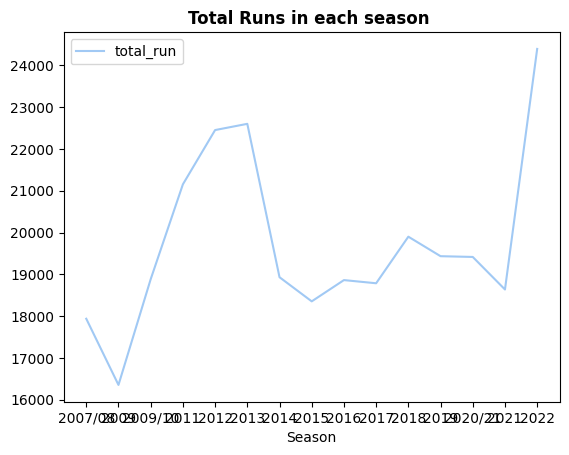

In [17]:
season=season_data.groupby(['Season'])['total_run'].sum().reset_index()
p=season.set_index('Season')
ax=plt.axes()
ax.set(facecolor="white")
sns.lineplot(data=p,palette="pastel")
plt.title('Total Runs in each season ',fontsize=12,fontweight="bold")
plt.show()

In [18]:
#Lest check runs scored in each season
runs_per_season=pd.concat([match_per_season,season.iloc[:,1]],axis=1)
runs_per_season['EACH MATCH RUNS']=runs_per_season['total_run']/runs_per_season['Matches']
runs_per_season.set_index('Season',inplace=True)
runs_per_season

,Matches,total_run,EACH MATCH RUNS
Season,,,
2007/08,58,17937,309.258621
2009,57,16353,286.894737
2009/10,60,18883,314.716667
2011,73,21154,289.780822
2012,74,22453,303.418919
2013,76,22602,297.394737
2014,60,18931,315.516667
2015,59,18353,311.067797
2016,60,18862,314.366667


<function matplotlib.pyplot.show(close=None, block=None)>

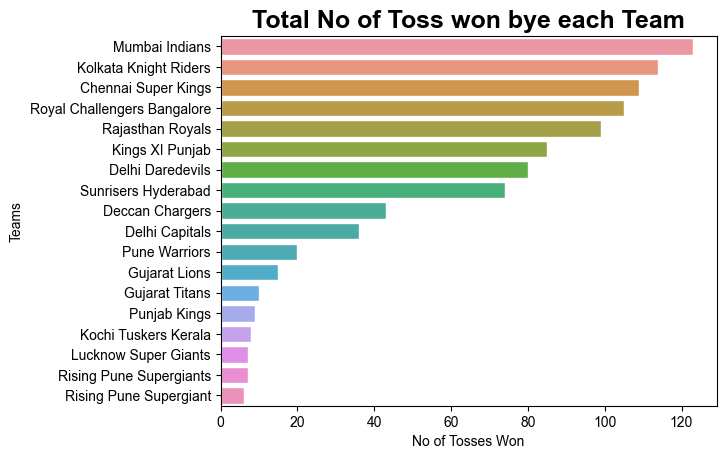

In [19]:
#Now Toss Won by each team
toss_won=match_data['TossWinner'].value_counts()
ax=plt.axes()
ax.set(facecolor="white")
sns.set(rc={'figure.figsize': (15,10)},style='whitegrid')
ax.set_title('Total No of Toss won bye each Team',fontsize=18,fontweight="bold")
sns.barplot(y=toss_won.index,x=toss_won)
plt.xlabel('No of Tosses Won')
plt.ylabel('Teams')
plt.show


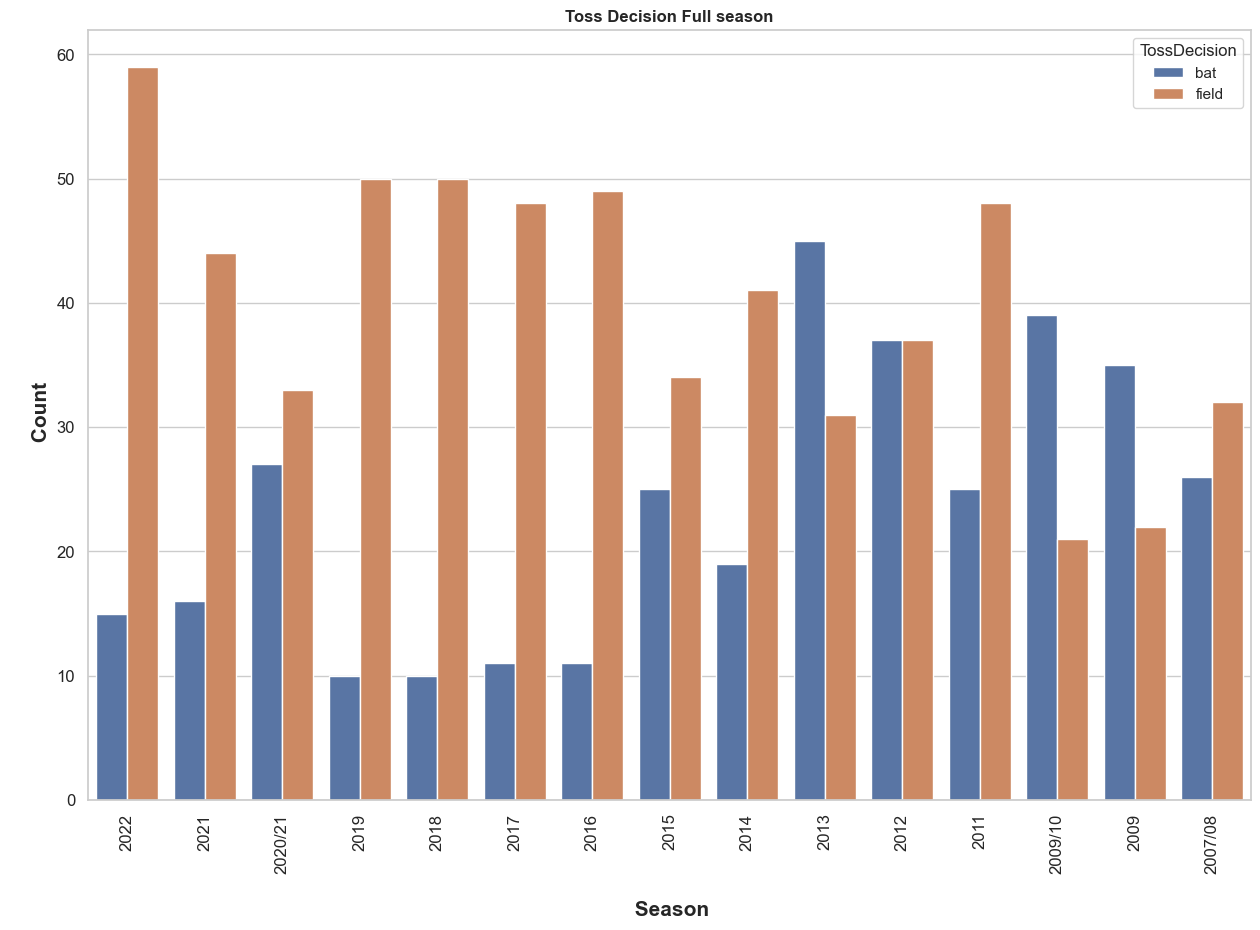

In [20]:
#Toss decision Bat or Ball
ax=plt.axes()
ax.set(facecolor = "white")
sns.countplot(x='Season',hue='TossDecision',data=match_data)
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('\n Season',fontsize=15,fontweight="bold")
plt.ylabel('\n Count',fontsize=15,fontweight="bold")
plt.title("Toss Decision Full season",fontsize=12,fontweight="bold")
plt.show()

In [21]:
#Chasing team won or batting team won or tie
match_data['WonBy'].value_counts()

Wickets      509
Runs         423
SuperOver     14
NoResults      4
Name: WonBy, dtype: int64

In [22]:
match_data.columns

Index(['ID', 'City', 'Date', 'Season', 'MatchNumber', 'Team1', 'Team2',
       'Venue', 'TossWinner', 'TossDecision', 'SuperOver', 'WinningTeam',
       'WonBy', 'Margin', 'method', 'Player_of_Match', 'Team1Players',
       'Team2Players', 'Umpire1', 'Umpire2'],
      dtype='object')

In [23]:
#Best Venue for chasing
#mode - most frequent data it willl return
match_data.Venue[match_data.WonBy != 'Runs'].mode()

0    Eden Gardens
Name: Venue, dtype: object

In [24]:
#Best Venue for Batting First
#mode - most frequent data it willl return
match_data.Venue[match_data.WonBy != 'Wickets'].mode()

0    Wankhede Stadium
Name: Venue, dtype: object

In [25]:
#Best stadium for team  winning the toss
match_data.Venue[match_data.TossWinner=='Mumbai Indians'][match_data.WinningTeam=='Mumbai Indians'].mode()

0    Wankhede Stadium
Name: Venue, dtype: object

In [26]:
#Best stadium for team  winning the oss
match_data.Venue[match_data.TossWinner=='Kolkata Knight Riders'][match_data.WinningTeam=='Kolkata Knight Riders'].mode()

0    Eden Gardens
Name: Venue, dtype: object

In [27]:
#Best stadium for team  winning the oss
match_data.Venue[match_data.TossWinner=='Deccan Chargers'][match_data.WinningTeam=='Deccan Chargers'].mode()

0                   Barabati Stadium
1         Dr DY Patil Sports Academy
2                   Feroz Shah Kotla
3                          Kingsmead
4    MA Chidambaram Stadium, Chepauk
5                    SuperSport Park
Name: Venue, dtype: object

In [28]:
#Best stadium for team  winning the oss
match_data.Venue[match_data.TossWinner=='Chennai Super Kings'][match_data.WinningTeam=='Chennai Super Kings'].mode()

0    MA Chidambaram Stadium, Chepauk
Name: Venue, dtype: object

In [29]:
#Best Chasing team
match_data.WinningTeam[match_data.WonBy!='Runs'].mode()

0    Kolkata Knight Riders
Name: WinningTeam, dtype: object

In [30]:
#Best Defending team
match_data.WinningTeam[match_data.WonBy!='Wickets'].mode()

0    Mumbai Indians
Name: WinningTeam, dtype: object

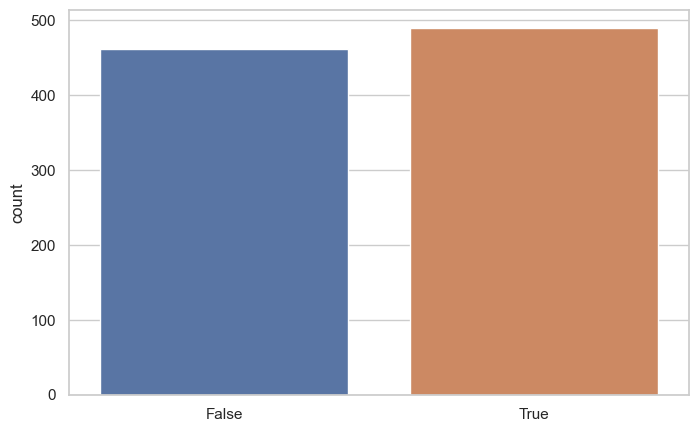

In [31]:
# Winnig toss means win match
tosswho=match_data['TossWinner']==match_data['WinningTeam']
plt.figure(figsize=(8,5))
sns.countplot(x=tosswho)
plt.show()

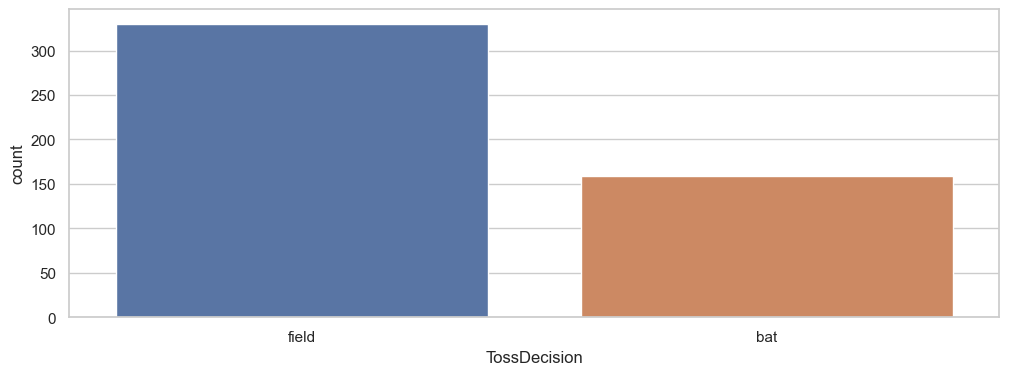

In [32]:
# Does choosing batting or bowling hep win matches
plt.figure(figsize=(12,4))
sns.countplot(x=match_data.TossDecision[match_data.TossWinner==match_data.WinningTeam])
plt.show()

In [33]:
ball_data.columns

Index(['ID', 'innings', 'overs', 'ballnumber', 'batter', 'bowler',
       'non-striker', 'extra_type', 'batsman_run', 'extras_run', 'total_run',
       'non_boundary', 'isWicketDelivery', 'player_out', 'kind',
       'fielders_involved', 'BattingTeam'],
      dtype='object')

In [41]:
player = (ball_data['batter']=='V Kohli')
df_kohli=ball_data[player]
df_kohli.head()

,ID,innings,overs,ballnumber,batter,bowler,non-striker,extra_type,batsman_run,extras_run,total_run,non_boundary,isWicketDelivery,player_out,kind,fielders_involved,BattingTeam
233,1312199,1,0,1,V Kohli,TA Boult,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
234,1312199,1,0,2,V Kohli,TA Boult,F du Plessis,NaN,1,0,1,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
236,1312199,1,0,4,V Kohli,TA Boult,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
237,1312199,1,0,5,V Kohli,TA Boult,F du Plessis,NaN,0,0,0,0,0,NaN,NaN,NaN,Royal Challengers Bangalore
238,1312199,1,0,6,V Kohli,TA Boult,F du Plessis,NaN,6,0,6,0,0,NaN,NaN,NaN,Royal Challengers Bangalore


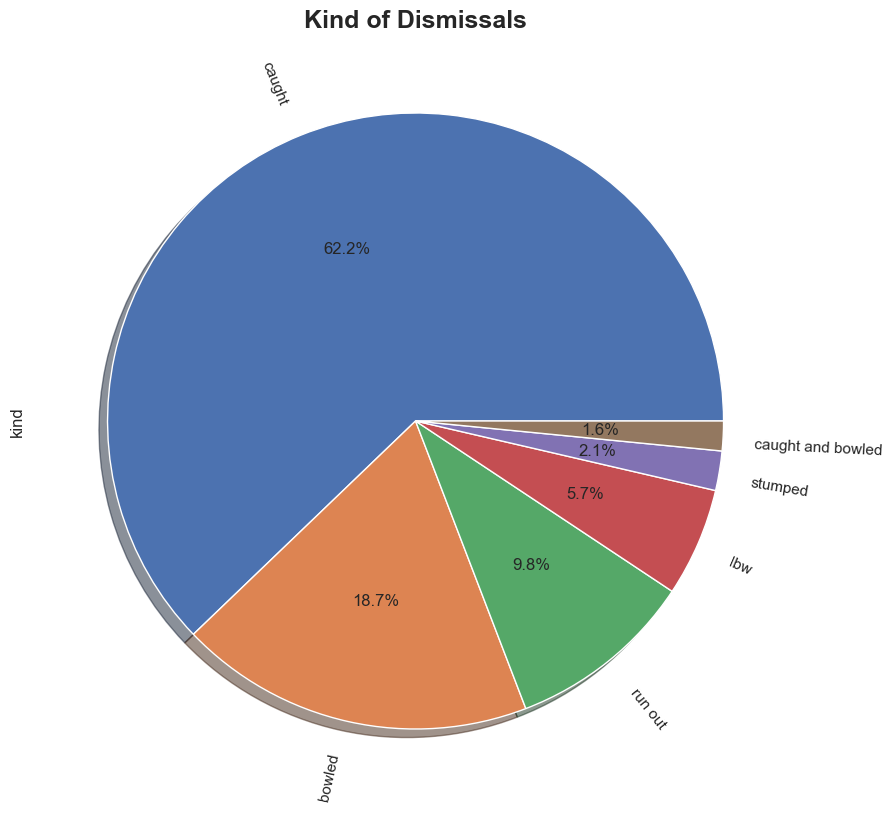

In [43]:
#Dismissal kind of Kohli
df_kohli['kind'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,rotatelabels=True)
plt.title("Kind of Dismissals",fontsize=18,fontweight="bold")
plt.show()

In [44]:
# Runs scored by kohli in 1,2 ,4,6
def count(df_kohli,runs):
    return len(df_kohli[df_kohli['batsman_run']==runs])*runs


In [45]:
print("Runs Scored from 6's : ",count(df_kohli,6))
print("Runs Scored from 4's : ",count(df_kohli,4))
print("Runs Scored from 3's : ",count(df_kohli,3))
print("Runs Scored from 2's : ",count(df_kohli,2))
print("Runs Scored from 1's : ",count(df_kohli,1))

Runs Scored from 6's :  1314
Runs Scored from 4's :  2324
Runs Scored from 3's :  57
Runs Scored from 2's :  756
Runs Scored from 1's :  2183


In [46]:
#Biggest win interms of win margin
match_data[match_data['Margin']==match_data['Margin'].max()]

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
329,1082635,Delhi,2017-05-06,2017,45,Delhi Daredevils,Mumbai Indians,Feroz Shah Kotla,Delhi Daredevils,field,N,Mumbai Indians,Runs,146.0,NaN,LMP Simmons,"['SV Samson', 'KK Nair', 'SS Iyer', 'RR Pant',...","['LMP Simmons', 'PA Patel', 'KA Pollard', 'RG ...",Nitin Menon,CK Nandan


In [55]:
#maximu runs score by player in ipl
runs=ball_data.groupby(['batter'])['batsman_run'].sum().reset_index()
runs.columns=['Batsmen','Runs']
topscore=runs.sort_values(by='Runs',ascending=False).head(10).reset_index().drop('index',axis=1)

In [56]:
topscore

,Batsmen,Runs
0,V Kohli,6634
1,S Dhawan,6244
2,DA Warner,5883
3,RG Sharma,5881
4,SK Raina,5536
5,AB de Villiers,5181
6,CH Gayle,4997
7,MS Dhoni,4978
8,RV Uthappa,4954
9,KD Karthik,4377


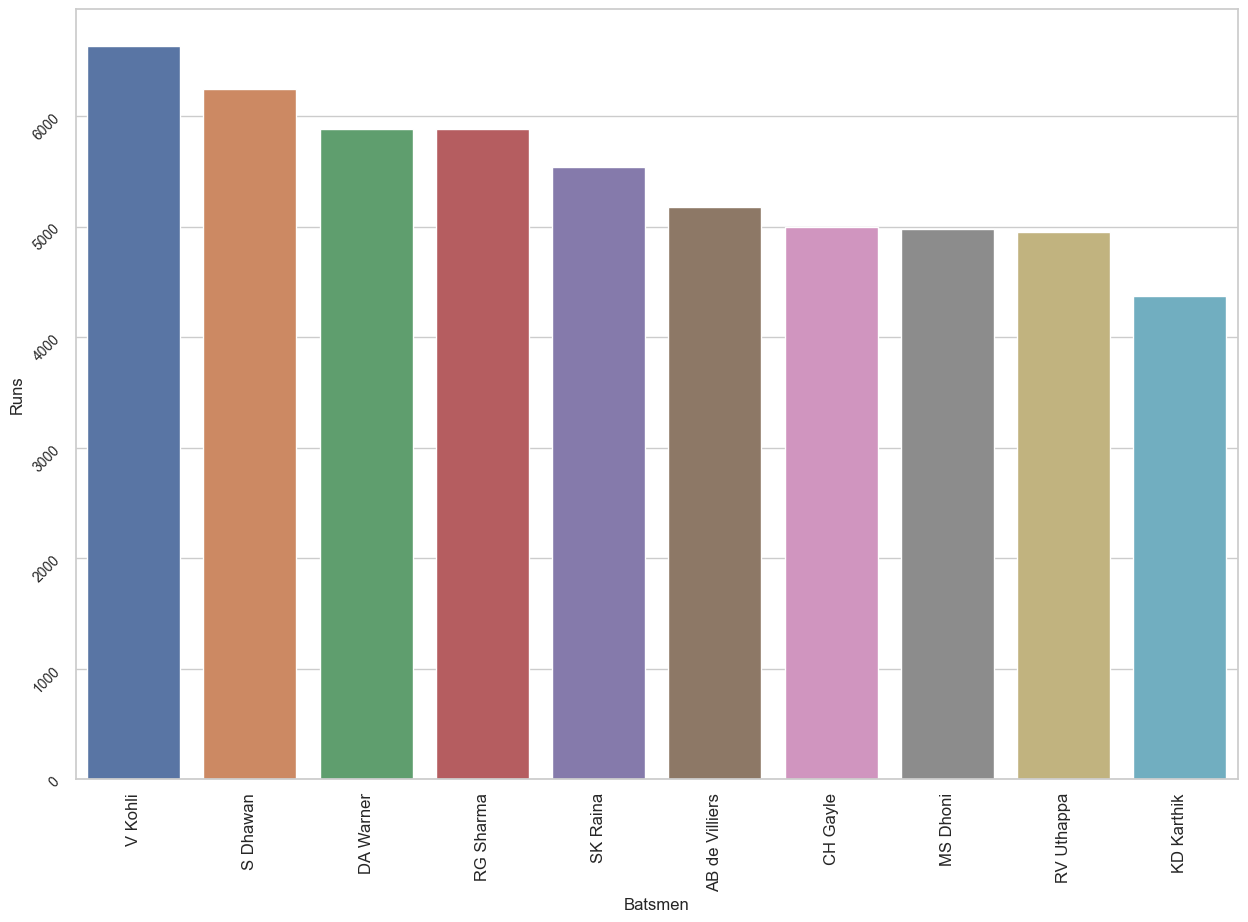

In [59]:
ax=plt.axes()
ax.set(facecolor='white')
sns.barplot(x=topscore['Batsmen'],y=topscore['Runs'])
plt.xticks(rotation=90,fontsize=12)
plt.yticks(rotation=45,fontsize=10)
plt.show()

Text(0.5, 1.0, 'Highest MOM Award Winner in IPL :')

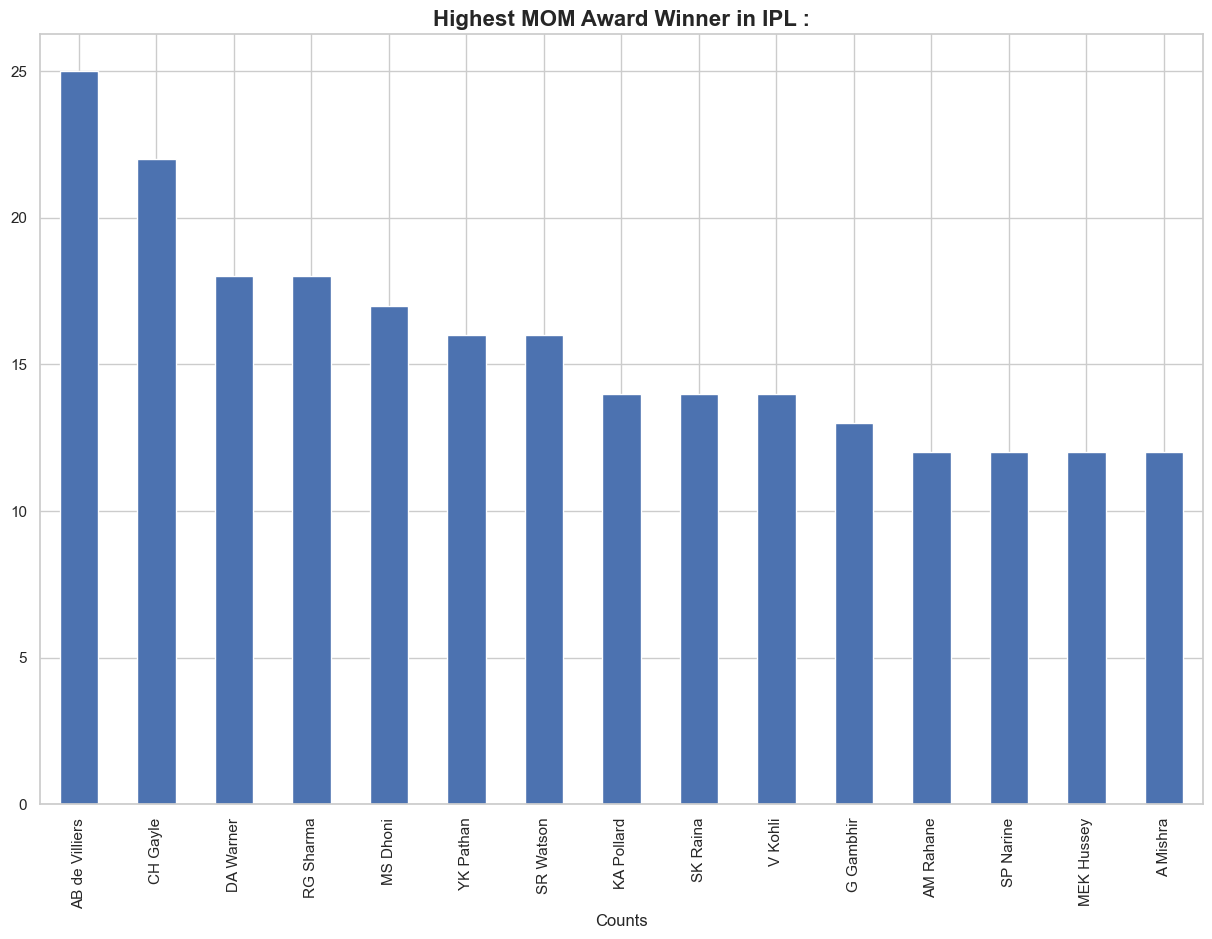

In [61]:
#maximum man of the match
ax=plt.axes()
ax.set(facecolor='white')
match_data.Player_of_Match.value_counts()[:15].plot(kind='bar')
plt.xlabel('Players')
plt.xlabel('Counts')
plt.title('Highest MOM Award Winner in IPL :',fontsize=16,fontweight="bold")
